# **Setting up the environment**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
freq_df = pd.read_csv("/kaggle/input/heart-rate-prediction-to-monitor-stress-level/Train Data/Train Data Zip/frequency_domain_features_train.csv")
heart_df = pd.read_csv("/kaggle/input/heart-rate-prediction-to-monitor-stress-level/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv")
time_df = pd.read_csv("/kaggle/input/heart-rate-prediction-to-monitor-stress-level/Train Data/Train Data Zip/time_domain_features_train.csv")

# **Understanding the data**

In [4]:
freq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   uuid     369289 non-null  object 
 1   VLF      369289 non-null  float64
 2   VLF_PCT  369289 non-null  float64
 3   LF       369289 non-null  float64
 4   LF_PCT   369289 non-null  float64
 5   LF_NU    369289 non-null  float64
 6   HF       369289 non-null  float64
 7   HF_PCT   369289 non-null  float64
 8   HF_NU    369289 non-null  float64
 9   TP       369289 non-null  float64
 10  LF_HF    369289 non-null  float64
 11  HF_LF    369289 non-null  float64
dtypes: float64(11), object(1)
memory usage: 33.8+ MB


In [5]:
freq_df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uuid       369289 non-null  object 
 1   SD1        369289 non-null  float64
 2   SD2        369289 non-null  float64
 3   sampen     369289 non-null  float64
 4   higuci     369289 non-null  float64
 5   datasetId  369289 non-null  int64  
 6   condition  369289 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 19.7+ MB


In [7]:
heart_df.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [8]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [9]:
time_df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


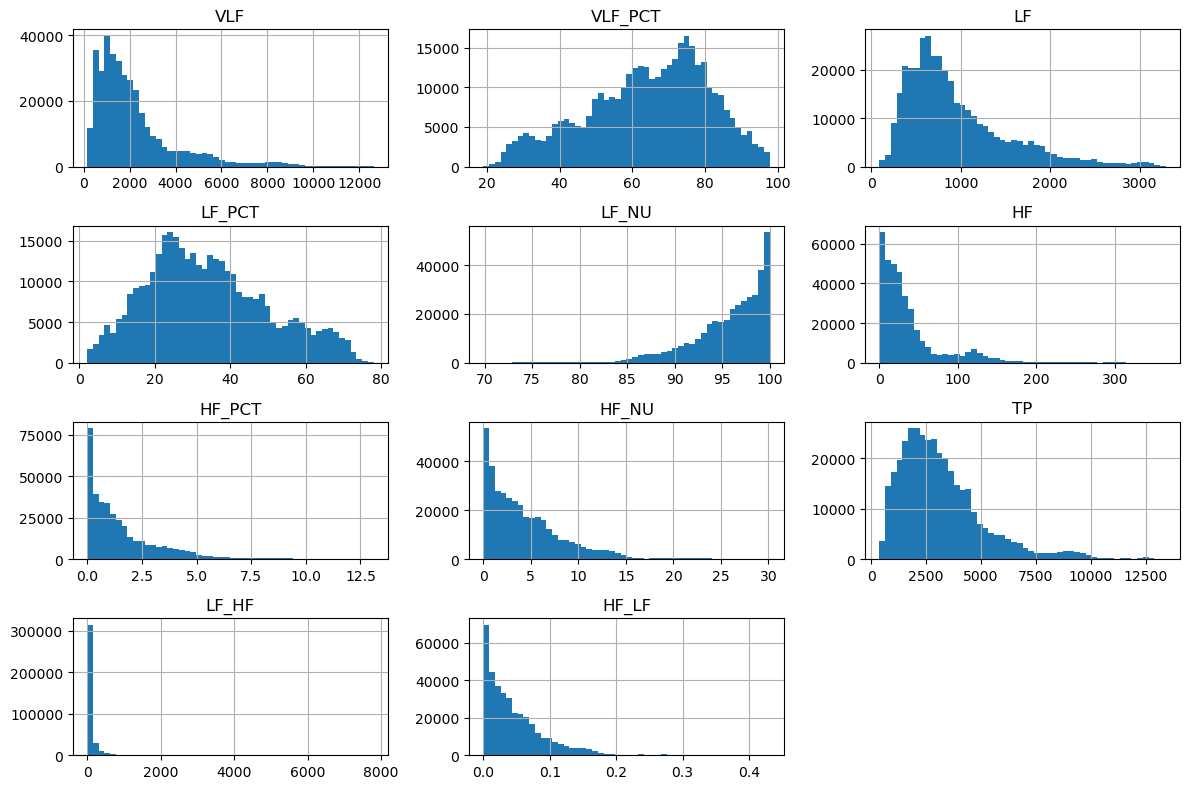

In [10]:
import matplotlib.pyplot as plt

freq_df.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

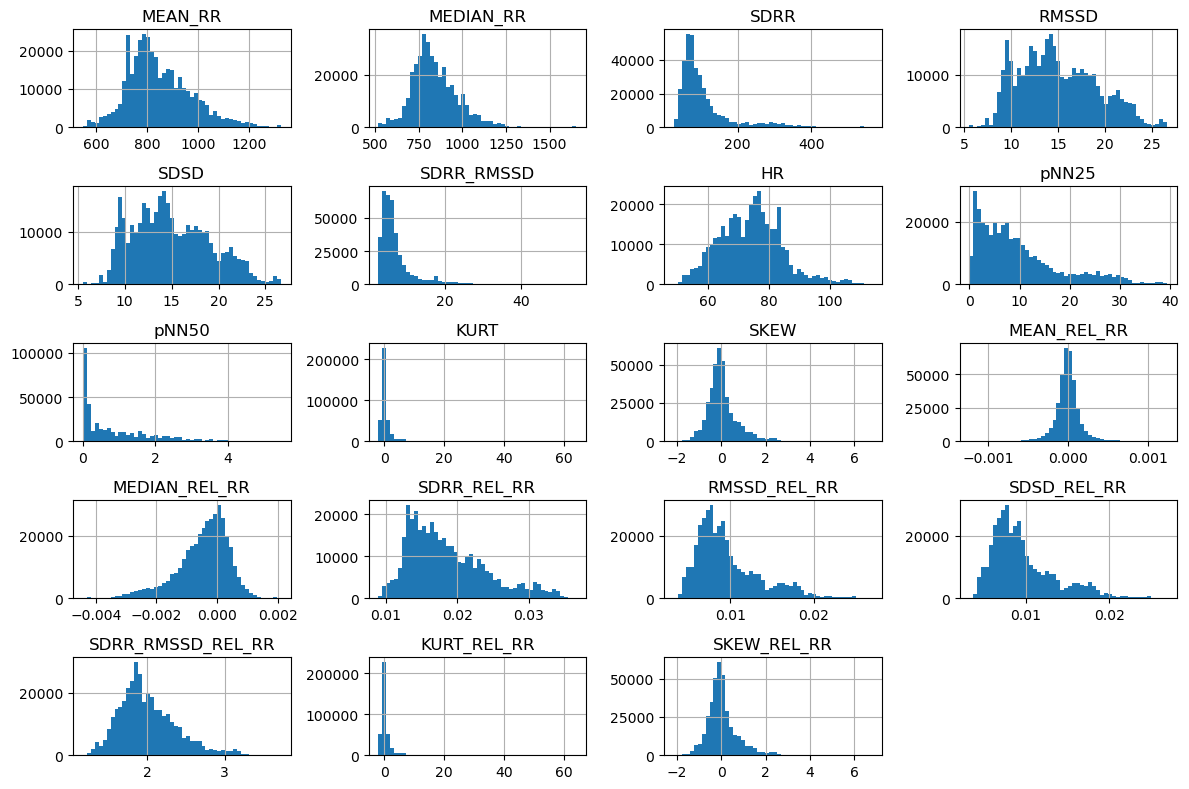

In [11]:
time_df.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

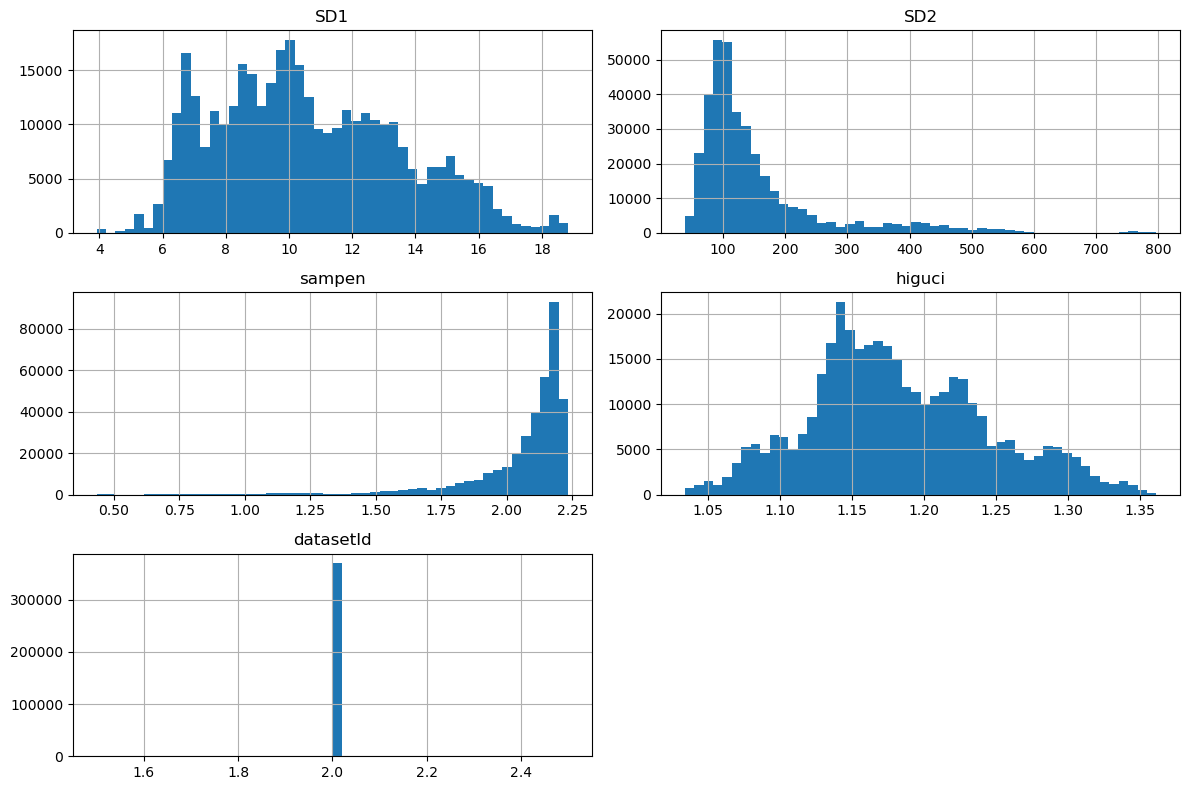

In [12]:
heart_df.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

In [13]:
heart_df['datasetId'].value_counts()

2    369289
Name: datasetId, dtype: int64

In [14]:
heart_df = heart_df.drop(['datasetId'],axis=1)

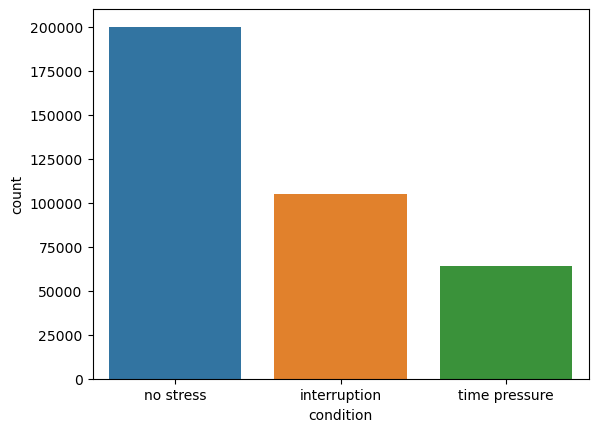

In [15]:
import seaborn as sn
ax = sn.countplot(x='condition',data=heart_df)

# **Feature engineering**

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

In [17]:
X_freq = freq_df.drop(['uuid'],axis=1)
X_heart = heart_df.drop(['uuid','condition'],axis=1)
X_time = time_df.drop(['uuid'],axis=1)

In [18]:
X_freq_reduced = pca.fit_transform(X_freq)
X_heart_reduced = pca.fit_transform(X_heart)
X_time_reduced = pca.fit_transform(X_time)

In [19]:
X_freq_reduced.shape

(369289, 2)

In [20]:
freq_df_reduced=pd.concat([pd.DataFrame(X_freq_reduced), pd.DataFrame(freq_df['uuid'])], axis=1)
freq_df_reduced.head()

,0,1,uuid
0,682.912914,26.299049,89df2855-56eb-4706-a23b-b39363dd605a
1,-58.966406,-317.329209,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,-913.293327,469.085220,c2d5d102-967c-487d-88f2-8b005a449f3e
3,326.992601,42.604506,37eabc44-1349-4040-8896-0d113ad4811f
4,-1108.505935,643.287759,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [21]:
freq_df_reduced.columns = ['freq_1', 'freq_2','uuid']

In [22]:
freq_df_reduced.head()

,freq_1,freq_2,uuid
0,682.912914,26.299049,89df2855-56eb-4706-a23b-b39363dd605a
1,-58.966406,-317.329209,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,-913.293327,469.085220,c2d5d102-967c-487d-88f2-8b005a449f3e
3,326.992601,42.604506,37eabc44-1349-4040-8896-0d113ad4811f
4,-1108.505935,643.287759,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [23]:
heart_df_reduced=pd.concat([pd.DataFrame(X_heart_reduced), pd.DataFrame(heart_df['uuid'])], axis=1)
heart_df_reduced.head()

,0,uuid
0,44.884436,89df2855-56eb-4706-a23b-b39363dd605a
1,-39.553559,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,-35.232400,c2d5d102-967c-487d-88f2-8b005a449f3e
3,-26.856192,37eabc44-1349-4040-8896-0d113ad4811f
4,-66.438384,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [24]:
heart_df_reduced.columns = ['heart_1','uuid']
heart_df_reduced.head()

,heart_1,uuid
0,44.884436,89df2855-56eb-4706-a23b-b39363dd605a
1,-39.553559,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,-35.232400,c2d5d102-967c-487d-88f2-8b005a449f3e
3,-26.856192,37eabc44-1349-4040-8896-0d113ad4811f
4,-66.438384,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [25]:
time_df_reduced=pd.concat([pd.DataFrame(X_time_reduced), pd.DataFrame(time_df['uuid'])], axis=1)
time_df_reduced.head()

,0,1,uuid
0,40.824785,27.507667,89df2855-56eb-4706-a23b-b39363dd605a
1,132.972637,-55.454162,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,76.411777,-41.445934,c2d5d102-967c-487d-88f2-8b005a449f3e
3,56.787026,-32.222307,37eabc44-1349-4040-8896-0d113ad4811f
4,-55.827394,-36.811171,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [26]:
time_df_reduced.columns = ['time_1', 'time_2','uuid']
time_df_reduced.head()

,time_1,time_2,uuid
0,40.824785,27.507667,89df2855-56eb-4706-a23b-b39363dd605a
1,132.972637,-55.454162,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,76.411777,-41.445934,c2d5d102-967c-487d-88f2-8b005a449f3e
3,56.787026,-32.222307,37eabc44-1349-4040-8896-0d113ad4811f
4,-55.827394,-36.811171,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [27]:
merged_df = pd.merge(freq_df_reduced, heart_df_reduced, on='uuid', how='inner')
merged_df.head()

,freq_1,freq_2,uuid,heart_1
0,682.912914,26.299049,89df2855-56eb-4706-a23b-b39363dd605a,44.884436
1,-58.966406,-317.329209,80c795e4-aa56-4cc0-939c-19634b89cbb2,-39.553559
2,-913.293327,469.085220,c2d5d102-967c-487d-88f2-8b005a449f3e,-35.232400
3,326.992601,42.604506,37eabc44-1349-4040-8896-0d113ad4811f,-26.856192
4,-1108.505935,643.287759,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,-66.438384


In [28]:
merged_df = pd.merge(merged_df, time_df_reduced, on='uuid', how='inner')
merged_df.head()

,freq_1,freq_2,uuid,heart_1,time_1,time_2
0,682.912914,26.299049,89df2855-56eb-4706-a23b-b39363dd605a,44.884436,40.824785,27.507667
1,-58.966406,-317.329209,80c795e4-aa56-4cc0-939c-19634b89cbb2,-39.553559,132.972637,-55.454162
2,-913.293327,469.085220,c2d5d102-967c-487d-88f2-8b005a449f3e,-35.232400,76.411777,-41.445934
3,326.992601,42.604506,37eabc44-1349-4040-8896-0d113ad4811f,-26.856192,56.787026,-32.222307
4,-1108.505935,643.287759,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,-66.438384,-55.827394,-36.811171


In [29]:
condition = heart_df['condition']

In [30]:
merged_df=pd.concat([merged_df, pd.DataFrame({'condition':condition})], axis=1)
merged_df.head()

,freq_1,freq_2,uuid,heart_1,time_1,time_2,condition
0,682.912914,26.299049,89df2855-56eb-4706-a23b-b39363dd605a,44.884436,40.824785,27.507667,no stress
1,-58.966406,-317.329209,80c795e4-aa56-4cc0-939c-19634b89cbb2,-39.553559,132.972637,-55.454162,interruption
2,-913.293327,469.085220,c2d5d102-967c-487d-88f2-8b005a449f3e,-35.232400,76.411777,-41.445934,interruption
3,326.992601,42.604506,37eabc44-1349-4040-8896-0d113ad4811f,-26.856192,56.787026,-32.222307,no stress
4,-1108.505935,643.287759,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,-66.438384,-55.827394,-36.811171,no stress


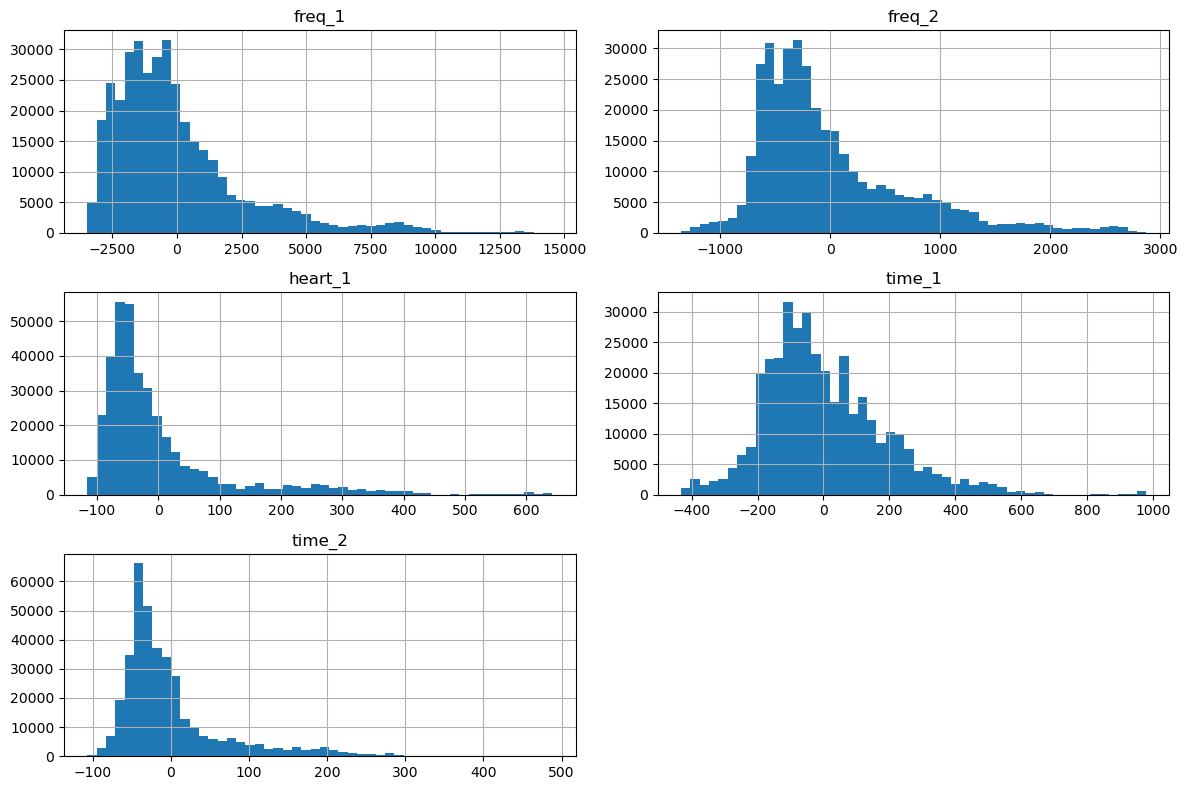

In [31]:
merged_df.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

In [32]:
merged_df = merged_df.drop(['uuid'],axis=1)

In [33]:
merged_df.head()

,freq_1,freq_2,heart_1,time_1,time_2,condition
0,682.912914,26.299049,44.884436,40.824785,27.507667,no stress
1,-58.966406,-317.329209,-39.553559,132.972637,-55.454162,interruption
2,-913.293327,469.085220,-35.232400,76.411777,-41.445934,interruption
3,326.992601,42.604506,-26.856192,56.787026,-32.222307,no stress
4,-1108.505935,643.287759,-66.438384,-55.827394,-36.811171,no stress


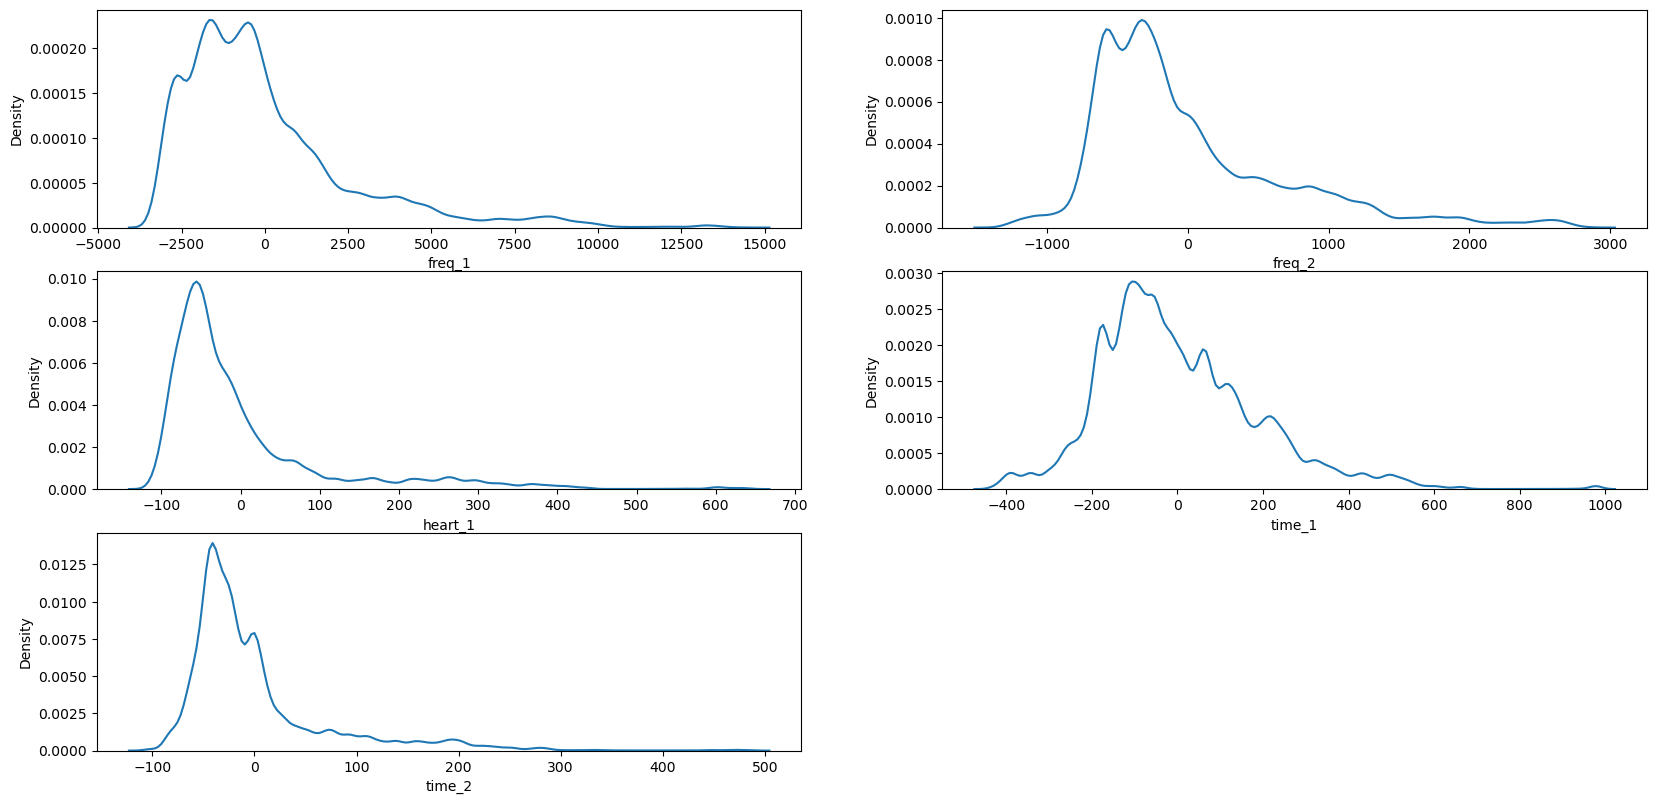

In [34]:
plt.figure(figsize=(20,30))
for i, col in enumerate(merged_df.columns):
    if merged_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sn.kdeplot(merged_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [35]:
from sklearn.utils import shuffle
merged_df = shuffle(merged_df)

In [36]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
merged_df[['condition']] = encoder.fit_transform(merged_df[['condition']])

# **Data split**

In [37]:
X = merged_df.drop(['condition'],axis=1)
y = merged_df['condition']

In [38]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [39]:
print("Training set shape : ",X_train.shape)
print("Validation set shape : ",X_valid.shape)
print("Testing set shape : ",X_test.shape)

Training set shape :  (221573, 5)
Validation set shape :  (73858, 5)
Testing set shape :  (73858, 5)


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

# **Neural Networks**

In [41]:
import tensorflow as tf

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
for layer in range(10):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
6925/6925 [==============================] - 40s 5ms/step - loss: 0.5950 - accuracy: 0.7503 - val_loss: 0.5680 - val_accuracy: 0.7593
Epoch 2/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.3665 - accuracy: 0.8573 - val_loss: 0.3196 - val_accuracy: 0.8757
Epoch 3/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.2708 - accuracy: 0.8956 - val_loss: 0.4810 - val_accuracy: 0.8534
Epoch 4/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.2156 - accuracy: 0.9192 - val_loss: 0.3980 - val_accuracy: 0.8654
Epoch 5/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.1775 - accuracy: 0.9340 - val_loss: 0.3227 - val_accuracy: 0.9025


In [45]:
score = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

2309/2309 [==============================] - 5s 2ms/step - loss: 0.3241 - accuracy: 0.9016
Test Accuracy : 90.1568 %


In [46]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()


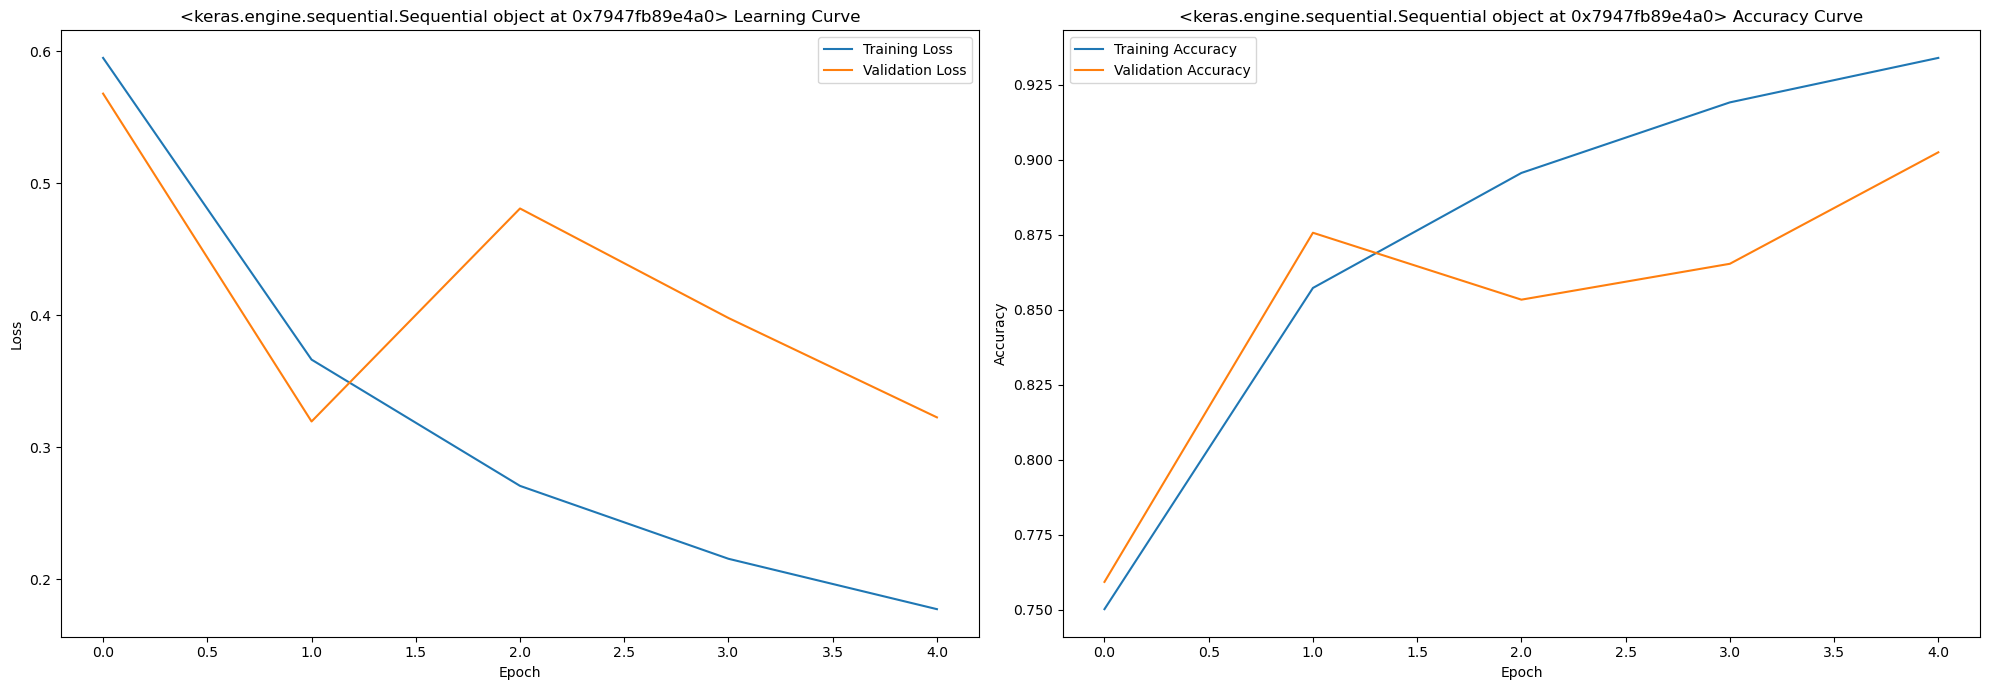

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()

In [48]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
for layer in range(10):
    tf.keras.layers.BatchNormalization(),
    model.add(tf.keras.layers.Dense(100, activation=leaky_relu,
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
6925/6925 [==============================] - 34s 5ms/step - loss: 0.4228 - accuracy: 0.8214 - val_loss: 0.2374 - val_accuracy: 0.9017
Epoch 2/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.2006 - accuracy: 0.9209 - val_loss: 0.1606 - val_accuracy: 0.9404
Epoch 3/5
6925/6925 [==============================] - 33s 5ms/step - loss: 0.1377 - accuracy: 0.9473 - val_loss: 0.1183 - val_accuracy: 0.9535
Epoch 4/5
6925/6925 [==============================] - 33s 5ms/step - loss: 0.1054 - accuracy: 0.9599 - val_loss: 0.0863 - val_accuracy: 0.9671
Epoch 5/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.0878 - accuracy: 0.9670 - val_loss: 0.0624 - val_accuracy: 0.9762


In [52]:
score = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

2309/2309 [==============================] - 5s 2ms/step - loss: 0.0624 - accuracy: 0.9772
Test Accuracy : 97.7227 %


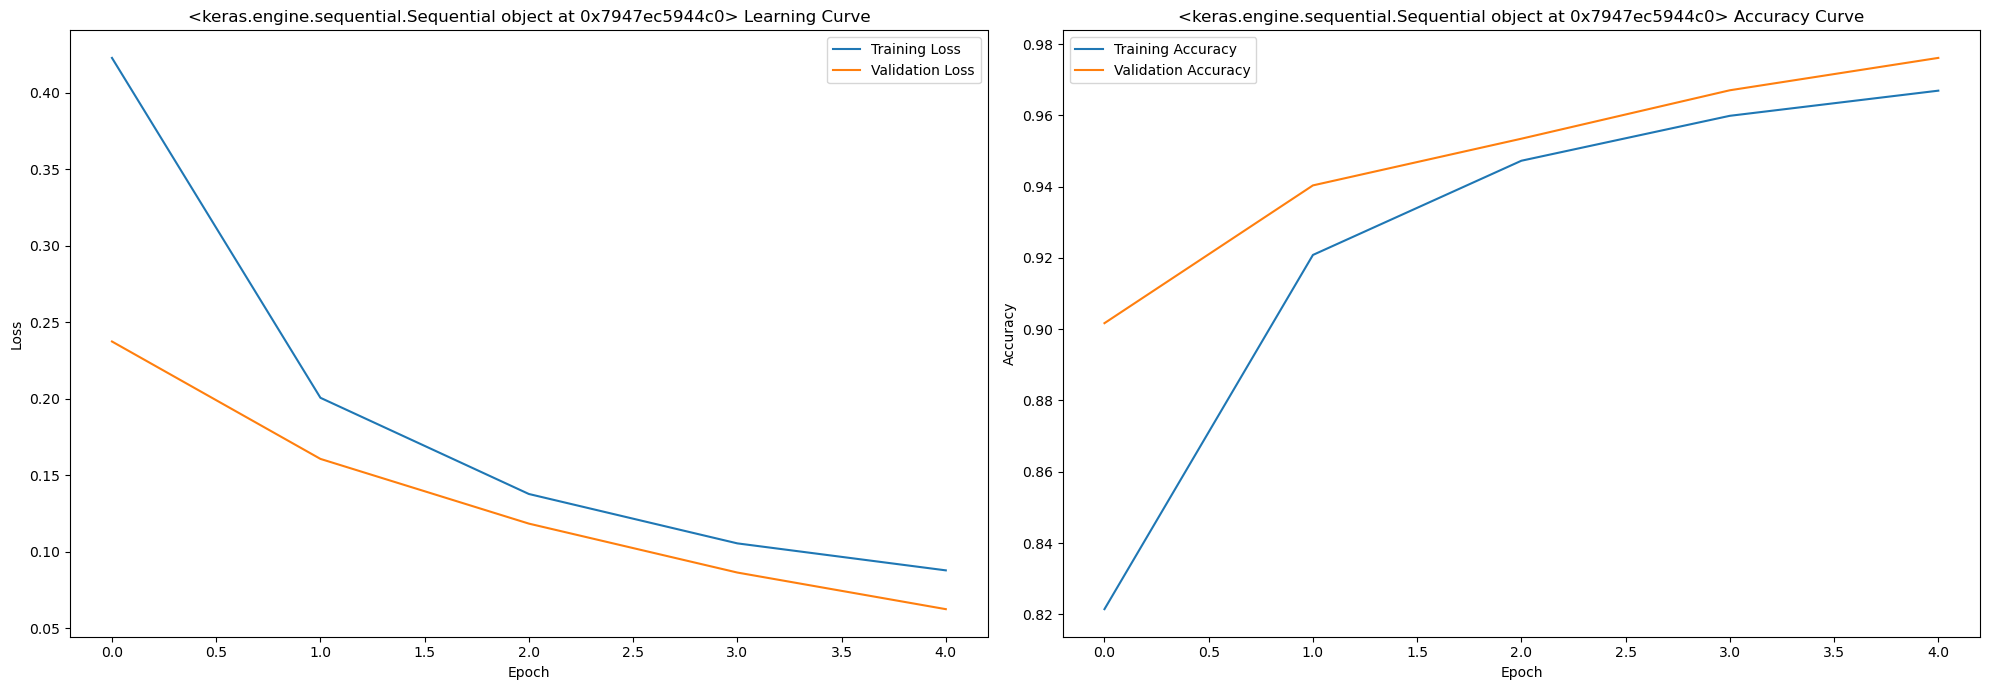

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
for layer in range(10):
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    model.add(tf.keras.layers.Dense(100, activation=leaky_relu,
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [55]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = optimizer,
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
6925/6925 [==============================] - 35s 5ms/step - loss: 0.4043 - accuracy: 0.8298 - val_loss: 0.2830 - val_accuracy: 0.8851
Epoch 2/5
6925/6925 [==============================] - 33s 5ms/step - loss: 0.2013 - accuracy: 0.9201 - val_loss: 0.1714 - val_accuracy: 0.9327
Epoch 3/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.1461 - accuracy: 0.9420 - val_loss: 0.1324 - val_accuracy: 0.9473
Epoch 4/5
6925/6925 [==============================] - 33s 5ms/step - loss: 0.1159 - accuracy: 0.9548 - val_loss: 0.0861 - val_accuracy: 0.9682
Epoch 5/5
6925/6925 [==============================] - 32s 5ms/step - loss: 0.0986 - accuracy: 0.9622 - val_loss: 0.1034 - val_accuracy: 0.9601


In [56]:
score = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

2309/2309 [==============================] - 6s 2ms/step - loss: 0.1046 - accuracy: 0.9594
Test Accuracy : 95.9409 %


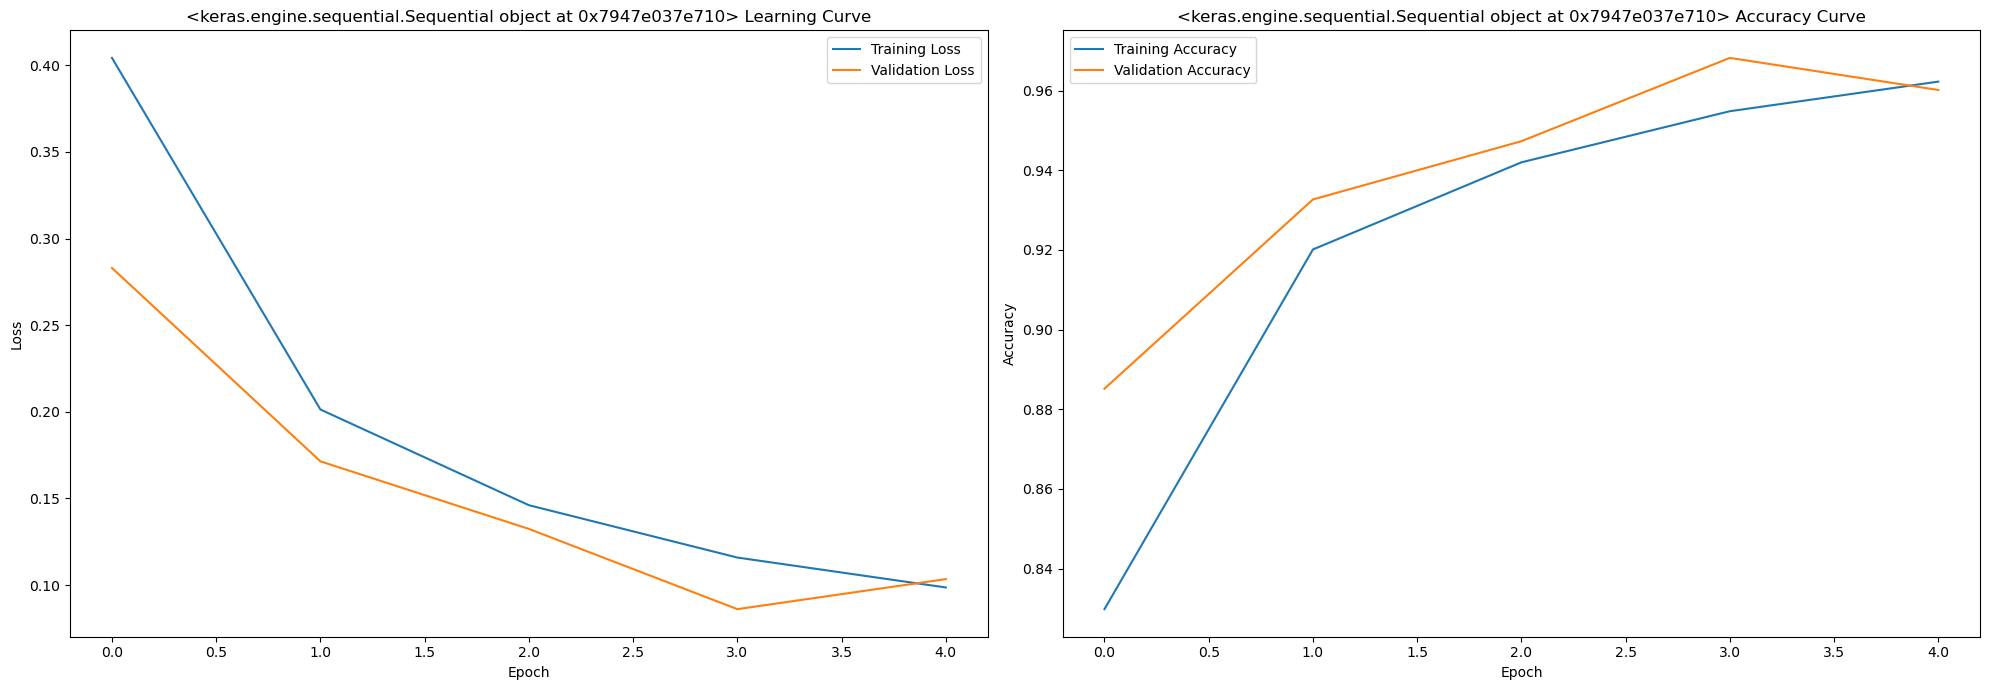

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history, model, axs[0])
plot_accuracy_curves(history, model, axs[1])

plt.tight_layout()
plt.show()